In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [3]:
data = np.array(pd.read_pickle("/content/gdrive/MyDrive/Colab Notebooks/CHEM277B/Homework7/mnist.pkl"), dtype=object)
data[0][0] = data[0][0]/255 
data[1][0] = data[1][0]/255

data[0][0].shape

(60000, 32, 32)

# Convolutional Neural Networks applied to classification 
We will again use the MNIST data set to train, validation, and test but this time using a CNN. As described in lecture, 2D convolutional neural networks are specified by various hyperparameters: a receptive field (filter size, DxWxH), number of filters K, stride S, amount of zero padding P, and type of pooling. We will represent our input data, as well as the hidden layers, as 3D arrays. Since MNIST images are black-and-white and thus have scalar-valued pixels, the depth of the input image is 1. 

### a) Calculate the dimensionality fo the output for the following convolutions sequentially applied to a black and white MNIST input. 

#### i) Convolution filter size of 2x2, number of filters 33, stride of 2, padding of 0. 

H out = [(H in + 2 x padding - dilation x (kernel_size - 1)-1/stride) + 1] 

Here: 
- H in = 32 
- padding = 0 
- dilation = 1 
- kernel_size = 2
- stride = 2 
---
- H out = [(32 + 2 x 0 - 1 x ( 2 - 1) - 1 / 2) + 1]
- H out = [(32 + 0 - 1 x ( 1 ) - 1 / 2 ) + 1] 
- H out = [(32 + 0 - 1 - 1 / 2) + 1] 
- H out = [(30/2) + 1] (round down the pixel) 
- H out = 16 

Since it is assumed that both the height and the width of the input image is the same, it can be assumed that the output width is 16. Thus, the output is 16 x 16 x 33. 

#### ii) Convolution filter size of 3x3, number of filters 55, stride of 1, padding of 1. 

H out = [(H in + 2 x padding - dilation x (kernel_size - 1)-1/stride) + 1] 

Here: 
- H in = 16 
- padding = 1 
- dilation = 1 
- kernel_size = 3
- stride = 1 
---
- H out = [(16 + 2 x 1 - 1 x ( 3 - 1) - 1 / 1) + 1]
- H out = [(16 + 2 - 1 x ( 2 ) - 1 / 1 ) + 1] 
- H out = [(16 + 2 - 2 - 1 / 1) + 1] 
- H out = [(15/1) + 1] 
- H out = 16

Since it is assumed that both the height and the width of the input image is the same, it can be assumed that the output width is 16. Thus, the output is 16 x 16 x 55. 

#### iii) Convolution filter size of 3x3, number of filters 77, stride of 1, padding of 1. 

H out = [(H in + 2 x padding - dilation x (kernel_size - 1)-1/stride) + 1] 

Here: 
- H in = 16
- padding = 1 
- dilation = 1 
- kernel_size = 3
- stride = 1 
---
- H out = [(16 + 2 x 1 - 1 x ( 3 - 1) - 1 / 1) + 1]
- H out = [(16 + 2 - 1 x ( 2 ) - 1 / 1 ) + 1] 
- H out = [(16 + 2 - 2 - 1 / 1) + 1] 
- H out = [(15/1) + 1] 
- H out = 16

Since it is assumed that both the height and the width of the input image is the same, it can be assumed that the output width is 16. Thus, the output is 16 x 16 x 77. 

#### This is followed by a Maxx Pooling with filter size of 2 x2, and stride of 2. 

Here:
- H in = 16 
- padding = 0 
- dilation = 1 
- kernel_size = 2 
- stride = 2 
---
- H out = [(16 + 2 x 0 - 1 x (2 - 1) - 1/2) + 1]
- H out = [(16 + 0 - 1 x (1) - 1/2) + 1]
- H out = [(16 - 1 - 1 / 2) + 1] 
- H out = [(14/2) + 1]
- H out = 8 

Thus, the output dimensionality is 8 x 8 x 77. 

### b) The MNIST data set was, in fact, in color (RGB). Thismeans the depth of the input image would be 3. Calculate the dimensionality of the output for the following convolutions sequentially applied to a RGB MNIST input:

#### i) Convolution Filter size of 2 x 2, number of filters 33, stride of 2, padding of 0

H out = [(H in + 2 x padding - dilation x (kernel_size - 1)-1/stride) + 1] 

Here: 
- H in = 32
- padding = 0 
- dilation = 1 
- kernel_size = 2
- stride = 2
---
- H out = [(32 + 2 x 0 - 1 x ( 2 - 1) - 1 / 2) + 1]
- H out = [(32 + 0 - 1 x ( 1 ) - 1 / 2 ) + 1] 
- H out = [(32 + 0 - 1 - 1 / 2) + 1] 
- H out = [(30/2) + 1] 
- H out = 16

Since it is assumed that both the height and the width of the input image is the same, it can be assumed that the output width is 16. Thus, the output is 16 x 16 x 33. 

#### ii) Convolution Filter size of 3 x 3, number of filters 55, stride of 1, padding of 1. 

H out = [(H in + 2 x padding - dilation x (kernel_size - 1)-1/stride) + 1] 

Here: 
- H in = 16
- padding = 1 
- dilation = 1 
- kernel_size = 3
- stride = 1
---
- H out = [(16 + 2 x 1 - 1 x ( 3 - 1) - 1 / 1) + 1]
- H out = [(16 + 2 - 1 x ( 2 ) - 1 / 1 ) + 1] 
- H out = [(16 + 2 - 2 - 1 / 1) + 1] 
- H out = [(15/1) + 1] 
- H out = 16

Since it is assumed that both the height and the width of the input image is the same, it can be assumed that the output width is 16. Thus, the output is 16 x 16 x 55. 

#### Followed by a max pooling layer of kernel size 3 x 3, stride of 1, padding of 0. 

Here: 
- H in = 16
- padding = 0 
- dilation = 1 
- kernel_size = 3
- stride = 1
---
- H out = [(16 + 2 x 0 - 1 x ( 3 - 1) - 1 / 1) + 1]
- H out = [(16 + 0 - 1 x ( 2 ) - 1 / 1 ) + 1] 
- H out = [(16 + 0 - 2 - 1 / 1) + 1] 
- H out = [(13/1) + 1] 
- H out = 14

Thus, the output is 14 x 14 x 55. 

#### iii) Convolution Filter size of 3 x 3, number of filters 77, stride of 1, padding of 1. 

H out = [(H in + 2 x padding - dilation x (kernel_size - 1)-1/stride) + 1] 

Here: 
- H in = 14
- padding = 1 
- dilation = 1 
- kernel_size = 3
- stride = 1
---
- H out = [(14 + 2 x 1 - 1 x ( 3 - 1) - 1 / 1) + 1]
- H out = [(14 + 2 - 1 x ( 2 ) - 1 / 1 ) + 1] 
- H out = [(14 + 2 - 2 - 1 / 1) + 1] 
- H out = [(13/1) + 1] 
- H out = 14

Since it is assumed that both the height and the width of the input image is the same, it can be assumed that the output width is 14. Thus, the output is 14 x 14 x 77. 

#### Followed by a max pooling layer of kernel size 2 x 2, stride of 2, padding of 0. 

Here: 
- H in = 14
- padding = 0 
- dilation = 1 
- kernel_size = 2
- stride = 2
---
- H out = [(14 + 2 x 0 - 1 x ( 2 - 1) - 1 / 2) + 1]
- H out = [(14 + 0 - 1 x ( 1 ) - 1 / 2 ) + 1] 
- H out = [(14 + 0 - 1 - 1 / 2) + 1] 
- H out = [(12/2) + 1] 
- H out = 7

Thus, the output is 7 x 7 x 77. 

### c) Next, implement a CNN to see if we can extract additional features from the MNIST data. For this start with one convolutional layer with a 5 x 5 kernel, with stride of 1, zero padding of size 2, and 3 output channels. Flatten the resulting feature maps and add a second layer of fully connected *FC) layer to the 10 - neuron output layer. Use ReLU as your activation function. Use the ADAM optimizer with learning rate of 1 e -3, batchsize of 128, and 30 epoch (you can also train for longer time if time permits). use mini - batches of data and converge your training to where the loss function is minimalm and choose some regularization techniques. Using 3 fod cross-validatio and report your average test accuracy.

In [4]:
from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print('func:%r  took: %2.4f sec' % (f.__name__,  te-ts))
        return result
    return wrap

from torch import nn 
import torch
from torch.optim import SGD, Adam
import torch.nn.functional as F
import random
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split

def create_chunks(complete_list, chunk_size=None, num_chunks=None):
    '''
    Cut a list into multiple chunks, each having chunk_size (the last chunk might be less than chunk_size) or having a total of num_chunk chunks
    '''
    chunks = []
    if num_chunks is None:
        num_chunks = math.ceil(len(complete_list) / chunk_size)
    elif chunk_size is None:
        chunk_size = math.ceil(len(complete_list) / num_chunks)
    for i in range(num_chunks):
        chunks.append(complete_list[i * chunk_size: (i + 1) * chunk_size])
    return chunks

class Trainer():
    def __init__(self, model, optimizer_type, learning_rate, epoch, batch_size, input_transform=lambda x: x):
        """ The class for training the model
        model: nn.Module
            A pytorch model
        optimizer_type: 'adam' or 'sgd'
        learning_rate: float
        epoch: int
        batch_size: int
        input_transform: func
            transforming input. Can do reshape here
        """
        self.model = model
        if optimizer_type == "sgd":
            self.optimizer = SGD(model.parameters(), learning_rate,momentum=0.9)
        elif optimizer_type == "adam":
            self.optimizer = Adam(model.parameters(), learning_rate)
            
        self.epoch = epoch
        self.batch_size = batch_size
        self.input_transform = input_transform


    @timing
    def train(self, inputs, outputs, val_inputs, val_outputs,early_stop=False,l2=False,silent=False):
        """ train self.model with specified arguments
        inputs: np.array, The shape of input_transform(input) should be (ndata,nfeatures)
        outputs: np.array shape (ndata,)
        val_nputs: np.array, The shape of input_transform(val_input) should be (ndata,nfeatures)
        val_outputs: np.array shape (ndata,)
        early_stop: bool
        l2: bool
        silent: bool. Controls whether or not to print the train and val error during training
        
        @return
        a dictionary of arrays with train and val losses and accuracies
        """
        inputs = self.input_transform(inputs)
        val_inputs = self.input_transform(val_inputs)
        ### convert data to tensor of correct shape and type here ###
        inputs = torch.tensor(inputs, dtype=torch.float)
        outputs = torch.tensor(outputs, dtype=torch.int64)
        losses = []
        accuracies = []
        val_losses = []
        val_accuracies = []
        weights = self.model.state_dict()
        lowest_val_loss = np.inf
        
        for n_epoch in tqdm(range(self.epoch), leave=False):
            self.model.train()
            batch_indices = list(range(inputs.shape[0]))
            random.shuffle(batch_indices)
            batch_indices = create_chunks(batch_indices, chunk_size=self.batch_size)
            epoch_loss = 0
            epoch_acc = 0
            for batch in batch_indices:
                batch_importance = len(batch) / len(outputs)
                batch_input = inputs[batch]
                batch_output = outputs[batch]
                ### make prediction and compute loss with loss function of your choice on this batch ###
                batch_predictions = self.model(batch_input)
                loss = nn.CrossEntropyLoss()(batch_predictions, batch_output)
                if l2:
                    ### Compute the loss with L2 regularization ###
                    l2_lambda = 0.00001
                    l2_norm = sum(p.pow(2.0).sum() for p in self.model.parameters())
                    loss += l2_lambda * l2_norm
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                ### Compute epoch_loss and epoch_acc
                epoch_loss += loss.detach().item() * batch_importance
                pred = torch.argmax(batch_predictions, axis=-1)
                acc = torch.sum(pred == batch_output).item() / len(batch_predictions)
                epoch_acc += acc * batch_importance
            val_loss, val_acc = self.evaluate(val_inputs, val_outputs, print_acc=False)
            if n_epoch % 10 ==0 and not silent: 
                print("Epoch %d/%d - Loss: %.3f - Acc: %.3f" % (n_epoch + 1, self.epoch, epoch_loss, epoch_acc))
                print("              Val_loss: %.3f - Val_acc: %.3f" % (val_loss, val_acc))
            losses.append(epoch_loss)
            accuracies.append(epoch_acc)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            if early_stop:
                if val_loss < lowest_val_loss:
                    lowest_val_loss = val_loss
                    weights = self.model.state_dict()

        if early_stop:
            self.model.load_state_dict(weights)    

        return {"losses": losses, "accuracies": accuracies, "val_losses": val_losses, "val_accuracies": val_accuracies}
        
    def evaluate(self, inputs, outputs, print_acc=True):
        """ evaluate model on provided input and output
        inputs: np.array, The shape of input_transform(input) should be (ndata,nfeatures)
        outputs: np.array shape (ndata,)
        print_acc: bool
        
        @return
        losses: float
        acc: float
        """
        inputs = self.input_transform(inputs)
        inputs = torch.tensor(inputs, dtype=torch.float32)
        outputs = torch.tensor(outputs, dtype=torch.int64)
        self.model.eval()
        batch_indices = list(range(inputs.shape[0]))
        batch_indices = create_chunks(batch_indices, chunk_size=self.batch_size)
        acc = 0
        losses = 0
        for batch in batch_indices:
            batch_importance = len(batch) / len(outputs)
            batch_input = inputs[batch]
            batch_output = outputs[batch]
            with torch.no_grad():
                ### Compute prediction and loss###
                batch_predictions = self.model(batch_input)
                loss = nn.CrossEntropyLoss()(batch_predictions, batch_output)
            pred = torch.argmax(batch_predictions, axis=-1)  
            batch_acc = torch.sum(pred == batch_output) / len(batch_predictions)
            losses += loss.detach().item() * batch_importance
            acc += batch_acc.detach().item() * batch_importance
        if print_acc:
            print("Accuracy: %.3f" % acc)
        return losses, acc


kf = KFold(n_splits=3, shuffle=True, random_state=42)
training_data = data[0][0]
training_labels = data[0][1]

training_set = []
validation_set = []
training_label = []
validation_label = []

# The data folder you are given is already organized into training, and a test set. Therefore, to create a validation set, 
# divide the original training data into 3-fold groups of training and validation data.
for train_index, val_index in kf.split(training_data):
    X_train, X_val = training_data[train_index], training_data[val_index]
    y_train, y_val = training_labels[train_index], training_labels[val_index]
    training_set.append(X_train)
    validation_set.append(X_val)
    training_label.append(y_train)
    validation_label.append(y_val)

In [5]:
from torch import nn
import torch
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5, stride=1, padding=2)
        self.fc = nn.Sequential(
            nn.Linear(3*32*32, 10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = x.view(-1, 1, 32, 32)
        x = F.relu(self.conv(x))
        x = x.view(-1, 3*32*32)
        x = self.fc(x)
        return x

  3%|▎         | 1/30 [00:04<02:12,  4.55s/it]

Epoch 1/30 - Loss: 1.825 - Acc: 0.351
              Val_loss: 1.709 - Val_acc: 0.386


 37%|███▋      | 11/30 [00:55<01:36,  5.06s/it]

Epoch 11/30 - Loss: 1.418 - Acc: 0.491
              Val_loss: 1.417 - Val_acc: 0.493


 70%|███████   | 21/30 [01:44<00:45,  5.04s/it]

Epoch 21/30 - Loss: 1.405 - Acc: 0.495
              Val_loss: 1.415 - Val_acc: 0.495


func:'train'  took: 165.1499 sec
Training accuracy:  0.49549999999999966
Validation accuracy:  0.49495


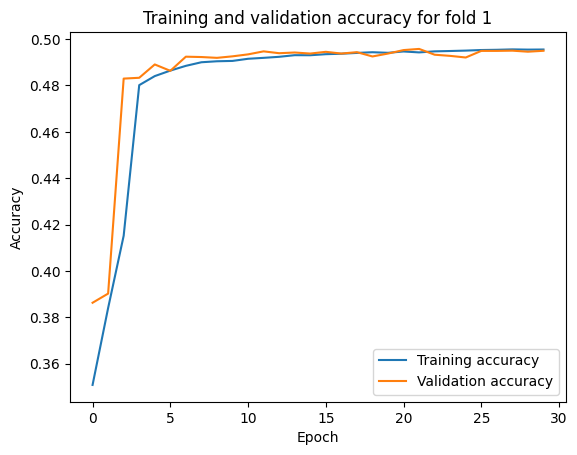

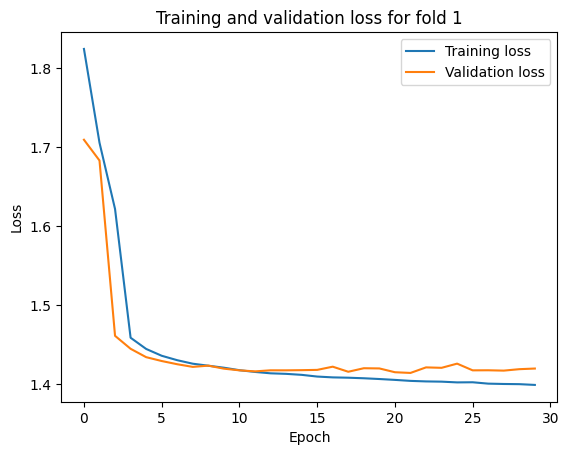

  3%|▎         | 1/30 [00:04<02:04,  4.29s/it]

Epoch 1/30 - Loss: 2.143 - Acc: 0.181
              Val_loss: 2.119 - Val_acc: 0.189


 37%|███▋      | 11/30 [00:54<01:37,  5.14s/it]

Epoch 11/30 - Loss: 1.644 - Acc: 0.396
              Val_loss: 1.663 - Val_acc: 0.391


 70%|███████   | 21/30 [01:46<00:46,  5.12s/it]

Epoch 21/30 - Loss: 1.630 - Acc: 0.398
              Val_loss: 1.653 - Val_acc: 0.392


func:'train'  took: 153.0265 sec
Training accuracy:  0.40022500000000005
Validation accuracy:  0.3928000000000002


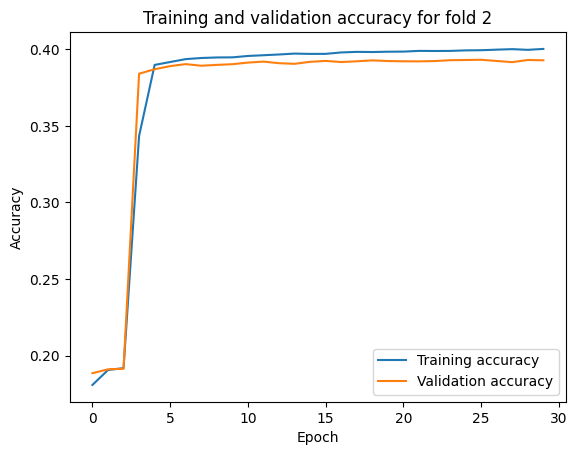

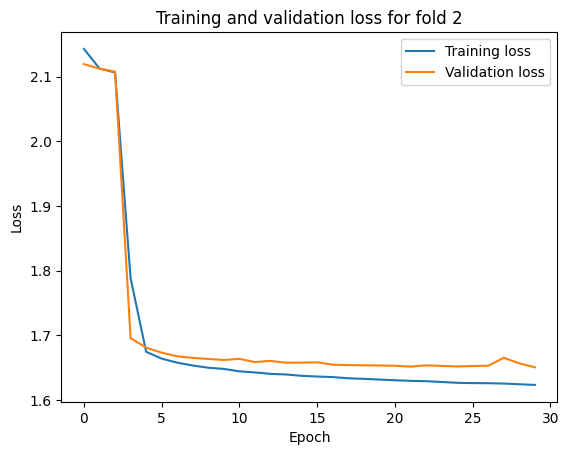

  3%|▎         | 1/30 [00:05<02:32,  5.25s/it]

Epoch 1/30 - Loss: 1.615 - Acc: 0.372
              Val_loss: 1.508 - Val_acc: 0.383


 37%|███▋      | 11/30 [00:54<01:30,  4.78s/it]

Epoch 11/30 - Loss: 1.232 - Acc: 0.488
              Val_loss: 1.242 - Val_acc: 0.488


 70%|███████   | 21/30 [01:44<00:45,  5.05s/it]

Epoch 21/30 - Loss: 1.209 - Acc: 0.490
              Val_loss: 1.224 - Val_acc: 0.487


func:'train'  took: 149.5484 sec
Training accuracy:  0.49144999999999955
Validation accuracy:  0.48724999999999996


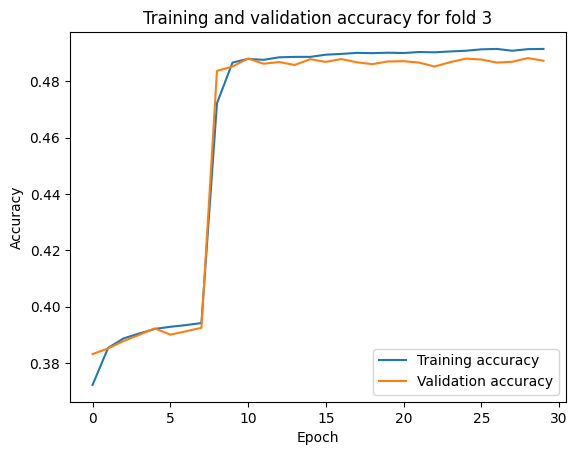

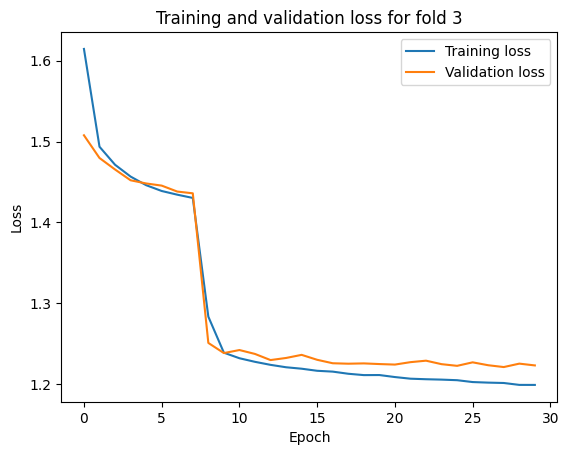

Summary: 
Training accuracy:  0.46239166666666637
Validation accuracy:  0.4583333333333334


In [6]:
# The training and validation accuracy of the model
# The training and validation accuracy of the model
run_info_list = []
for i in range(3):
    model = LeNet()
    trainer = Trainer(model, optimizer_type='adam', learning_rate=1e-3, batch_size=128, epoch=30, input_transform = lambda x:x)
    run_info = trainer.train(training_set[i], training_label[i], validation_set[i], validation_label[i])
    run_info_list.append(run_info)
    print("Training accuracy: ", run_info["accuracies"][-1])
    print("Validation accuracy: ", run_info["val_accuracies"][-1])

    # Plot the training and validation accuracy for fold 1 
    plt.plot(run_info["accuracies"], label="Training accuracy")
    plt.plot(run_info["val_accuracies"], label="Validation accuracy")
    plt.title("Training and validation accuracy for fold %d" % (i+1))
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Plot the training and validation loss for fold 1
    plt.plot(run_info["losses"], label="Training loss")
    plt.plot(run_info["val_losses"], label="Validation loss")
    plt.title("Training and validation loss for fold %d" % (i+1))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Summarize the training and validation accuracy of the model over the three folds 
print("Summary: ")
print("Training accuracy: ", np.mean([run_info["accuracies"][-1] for run_info in run_info_list]))
print("Validation accuracy: ", np.mean([run_info["val_accuracies"][-1] for run_info in run_info_list]))

In [11]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Reshape input to a 4D tensor
        x = x.view(-1, 1, 32, 32)
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = nn.Flatten()(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

20000


  3%|▎         | 1/30 [00:26<12:43, 26.31s/it]

Epoch 1/30 - Loss: 0.398 - Acc: 0.884
              Val_loss: 0.129 - Val_acc: 0.962


 37%|███▋      | 11/30 [04:53<08:25, 26.62s/it]

Epoch 11/30 - Loss: 0.013 - Acc: 0.996
              Val_loss: 0.047 - Val_acc: 0.987


 70%|███████   | 21/30 [09:17<03:57, 26.40s/it]

Epoch 21/30 - Loss: 0.007 - Acc: 0.998
              Val_loss: 0.051 - Val_acc: 0.989


func:'train'  took: 791.8102 sec
Training accuracy:  0.9987749999999963
Validation accuracy:  0.9871999999999981


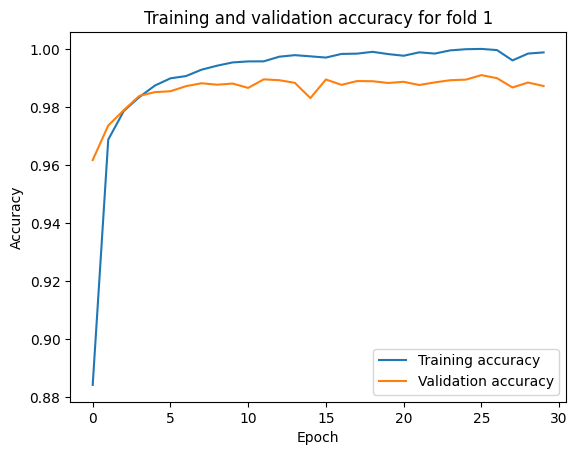

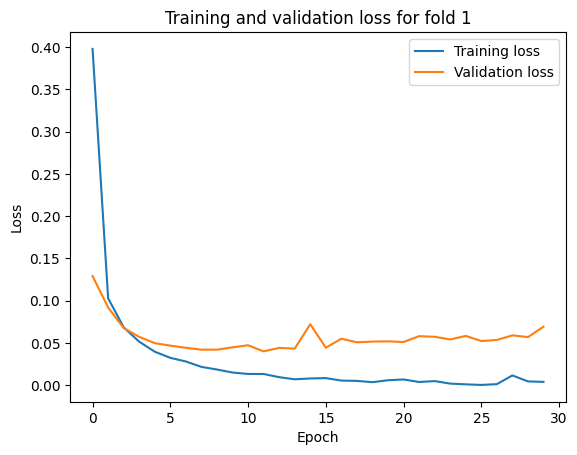

20000


  3%|▎         | 1/30 [00:25<12:28, 25.80s/it]

Epoch 1/30 - Loss: 0.418 - Acc: 0.880
              Val_loss: 0.154 - Val_acc: 0.954


 37%|███▋      | 11/30 [04:42<08:10, 25.82s/it]

Epoch 11/30 - Loss: 0.016 - Acc: 0.995
              Val_loss: 0.047 - Val_acc: 0.987


 70%|███████   | 21/30 [09:00<03:51, 25.67s/it]

Epoch 21/30 - Loss: 0.004 - Acc: 0.999
              Val_loss: 0.053 - Val_acc: 0.989


func:'train'  took: 773.6184 sec
Training accuracy:  0.9985999999999973
Validation accuracy:  0.986849999999998


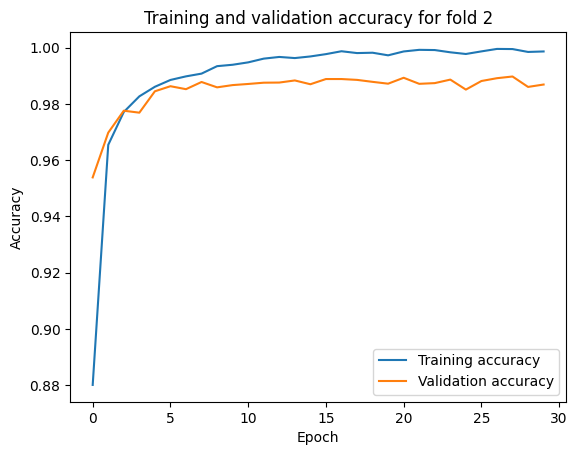

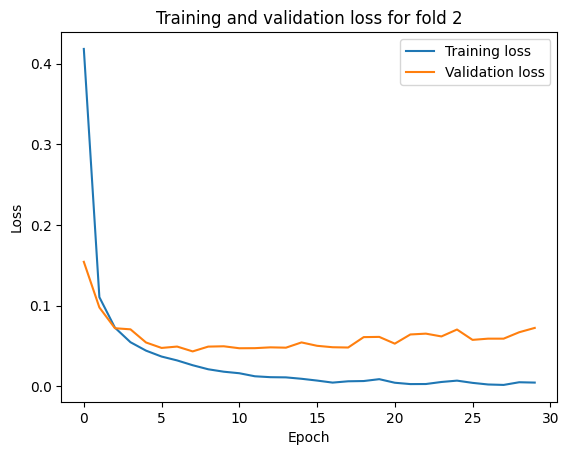

20000


  3%|▎         | 1/30 [00:25<12:24, 25.67s/it]

Epoch 1/30 - Loss: 0.447 - Acc: 0.867
              Val_loss: 0.158 - Val_acc: 0.950


 37%|███▋      | 11/30 [04:43<08:10, 25.81s/it]

Epoch 11/30 - Loss: 0.018 - Acc: 0.994
              Val_loss: 0.051 - Val_acc: 0.984


 70%|███████   | 21/30 [09:01<03:51, 25.67s/it]

Epoch 21/30 - Loss: 0.007 - Acc: 0.998
              Val_loss: 0.058 - Val_acc: 0.987


func:'train'  took: 776.0233 sec
Training accuracy:  0.9996749999999964
Validation accuracy:  0.9868499999999981


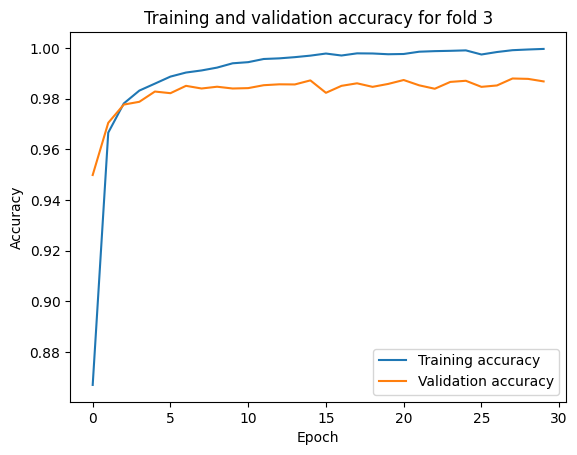

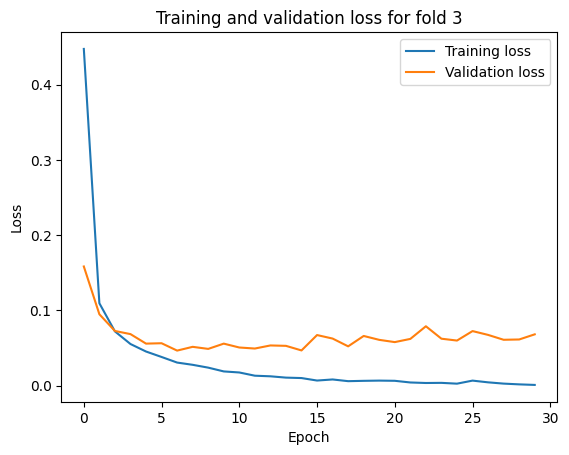

Summary: 
Training accuracy:  0.9990166666666633
Validation accuracy:  0.9869666666666648


In [12]:
# The training and validation accuracy of the model
# The training and validation accuracy of the model
run_info_list = []
for i in range(3):
    model = ConvNet()
    trainer = Trainer(model, optimizer_type='adam', learning_rate=1e-3, batch_size=128, epoch=30, input_transform = lambda x:x)
    print(len(validation_set[i]))
    run_info = trainer.train(training_set[i], training_label[i], validation_set[i], validation_label[i])
    run_info_list.append(run_info)
    print("Training accuracy: ", run_info["accuracies"][-1])
    print("Validation accuracy: ", run_info["val_accuracies"][-1])

    # Plot the training and validation accuracy for fold 1 
    plt.plot(run_info["accuracies"], label="Training accuracy")
    plt.plot(run_info["val_accuracies"], label="Validation accuracy")
    plt.title("Training and validation accuracy for fold %d" % (i+1))
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Plot the training and validation loss for fold 1
    plt.plot(run_info["losses"], label="Training loss")
    plt.plot(run_info["val_losses"], label="Validation loss")
    plt.title("Training and validation loss for fold %d" % (i+1))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Summarize the training and validation accuracy of the model over the three folds 
print("Summary: ")
print("Training accuracy: ", np.mean([run_info["accuracies"][-1] for run_info in run_info_list]))
print("Validation accuracy: ", np.mean([run_info["val_accuracies"][-1] for run_info in run_info_list]))